<a href="https://colab.research.google.com/github/atreya221/Project_Submission_ANN_SC/blob/master/Assignment_03/MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST dataset training using tensorflow

##Import essential modules

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print(tf.__version__)

2.3.0


##Load MNIST dataset

In [15]:
((img_train,label_train),(img_test,label_test)) = tfds.as_numpy(tfds.load(
    'mnist',
    split = ['train','test'],
    batch_size = -1,
    as_supervised = True,
))

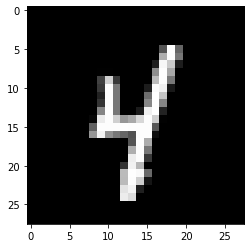

4


In [16]:
plt.imshow(img_train[0].reshape(28,-1),cmap='gray')
plt.show()
print(label_train[0])

##Build training pipeline

In [28]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [29]:
def normalize_img(image, label):
  """ cast image data from `uint8` to `float32` type """
  return tf.cast(image, tf.float32)/255., label

In [30]:
ds_train = ds_train.map(normalize_img,num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

##Build evaluation pipeline

In [31]:
ds_test = ds_test.map(normalize_img,num_parallel_calls = tf.data.experimental.AUTOTUNE)
# ds.test = ds_test.shuffle(ds_info.splits['test'].num_examples)  ** NO SHUFFLING IN TEST SET DATA **
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

##Create and train the Model

###1. Define the Model

In [32]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape = (28,28,1)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [33]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


###2. Compile the Model with suitable loss function and optimizer

In [34]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])

###3. Train the Model 

In [35]:
model.fit(ds_train,epochs=20,validation_data=ds_test)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3587 - accuracy: 0.9021 - val_loss: 0.1850 - val_accuracy: 0.9472
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1599 - accuracy: 0.9546 - val_loss: 0.1349 - val_accuracy: 0.9611
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1138 - accuracy: 0.9670 - val_loss: 0.1036 - val_accuracy: 0.9686
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.9747 - val_loss: 0.0921 - val_accuracy: 0.9724
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9795 - val_loss: 0.0857 - val_accuracy: 0.9741
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0593 - accuracy: 0.9828 - val_loss: 0.0820 - val_accuracy: 0.9744
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0498 - accuracy: 0.9858 - val_loss: 0.0737 - val_accuracy: 0.9779
Epoch 